正在爬取评论...


Building prefix dict from the default dictionary ...


评论数据已保存到 comments.csv
正在生成词云...


Dumping model to file cache C:\Users\23755\AppData\Local\Temp\jieba.cache
Loading model cost 0.862 seconds.
Prefix dict has been built successfully.


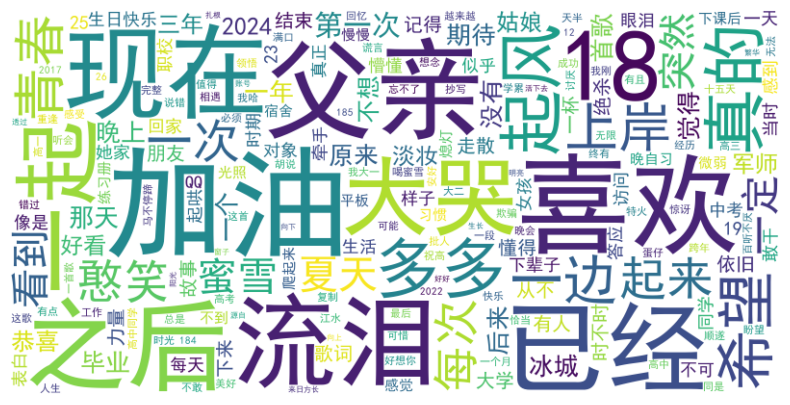

In [ ]:
# 导入必要的库
import requests
import json
import pandas as pd
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# 配置爬取参数
def get_comments(song_id, limit=100):
    
    url = f"https://music.163.com/api/v1/resource/comments/R_SO_4_{song_id}?limit={limit}&offset=0"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
        "Referer": "https://music.163.com/",
    }

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()
        comments = [item['content'] for item in data['comments']]
        return comments
    else:
        print(f"请求失败，状态码：{response.status_code}")
        return []

def save_comments_to_csv(comments, filename="comments.csv"):
    """
    保存评论到CSV文件
    """
    df = pd.DataFrame(comments, columns=["comment"])
    df.to_csv(filename, index=False, encoding="utf-8-sig")
    print(f"评论数据已保存到 {filename}")

def generate_wordcloud(comments, stopwords_path="stopwords.txt"):
    """
    根据评论生成词云
    """
    # 中文分词
    text = " ".join(comments)
    words = jieba.cut(text)

    # 去除停用词
    stopwords = set()
    if stopwords_path:
        with open(stopwords_path, "r", encoding="utf-8") as f:
            stopwords.update([line.strip() for line in f])

    words = [word for word in words if word not in stopwords and len(word) > 1]

    # 统计词频
    word_counts = Counter(words)

    # 生成词云
    wordcloud = WordCloud(
        font_path="simhei.ttf",  # 黑体字体，适合中文
        width=800,
        height=400,
        background_color="white"
    ).generate_from_frequencies(word_counts)

    # 显示词云
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

def main():
    # 配置歌曲ID（可以从网易云音乐分享链接中获取）
    song_id = "1330348068"  # 示例：ID对应的歌曲是《起风了》
    
    # 爬取评论
    print("正在爬取评论...")
    comments = get_comments(song_id, limit=100)
    if not comments:
        print("未获取到评论数据")
        return

    # 保存到CSV
    save_comments_to_csv(comments)

    # 生成词云
    print("正在生成词云...")
    generate_wordcloud(comments)

if __name__ == "__main__":
    main()

